# Vitber prosjekt - teknisk fysikk
##### _Hvorfor sank Vasaskipet?_

Innledning: 

In [108]:
#Inportering av relevante filer
%matplotlib inline

import numpy as np
from math import factorial
import matplotlib.pyplot as plt

#Constant parametes 
sigma_0 = 1000              #water density [kg/m^2] 
sigma = 500                 #Ship density [kg/m^2] 
R = 10                      #Ship radius [m]
A_s = 1/2 * np.pi * R**2    #Ship cross section 
m = A_s * sigma      #Ship's mass per length unit (in z direcion)
A_0 = sigma*np.pi*R**2 / (2*sigma_0)

I_c = 1/2 * m * R**2 * (1-(32)) #Ships moment of intertia
g = 981/100          #Gravitational acceleration9*np.pi**2))   
h = 0.42* R                 #Distanve from center of mass to physical senter
w_0 = np.sqrt(m*g*h/I_c)

<ipython-input-108-4faaf3da657b>:19: RuntimeWarning: invalid value encountered in sqrt
  w_0 = np.sqrt(m*g*h/I_c)


## Oppgave 1:
##### 1a) 

Bruker newtons metode for å finne sektorvinkelen ved å løse ligning (3) fra oppgaveteskten: 
$$ \beta - sin(\beta) = \pi \frac{\sigma}{\sigma _0} = \pi \frac{500}{1000} = \frac{\pi}{2}.$$
Hvor $\sigma = 500$ og $\sigma _0 = 1000$ er gitt i oppgaveteksten. 
 
Funksjonen _newton_ er hentet fra nonlinearequations.py brukt i forelesning.

In [109]:
#Oppgave 1b)
def newton(f, df, x0, tol=1.e-8, max_iter=30):
    ''' Solve f(x)=0 by Newtons method
        The output of each iteration is printed
        Input:
        f, df:   The function f and its derivate f'.
        x0:  Initial values
        tol: The tolerance
      Output:
        The root and the number of iterations
    '''
    x = x0
    print(f"k ={0:3d}, x = {x:18.15f}, f(x) = {f(x):10.3e}")
    for k in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:           # Aksepterer løsningne 
            break 
        x = x - fx/df(x)            # Newton-iterasjon
        print(f"k ={k+1:3d}, x = {x:18.15f}, f(x) = {f(x):10.3e}")
    return x, k+1

def f3(x):
    return x - np.sin(x) -np.pi*(sigma/sigma_0)

def df3(x):
    return 1-np.cos(x)


In [110]:
beta, its = newton(f3, df3, 1, tol=1.e-8, max_iter=30)     #Sectorangle at equilibrium

k =  0, x =  1.000000000000000, f(x) = -1.412e+00
k =  1, x =  4.072165315664378, f(x) =  3.303e+00
k =  2, x =  2.004190348602299, f(x) = -4.742e-01
k =  3, x =  2.338110892468609, f(x) =  4.754e-02
k =  4, x =  2.310052265401056, f(x) =  2.859e-04
k =  5, x =  2.309881466450786, f(x) =  1.078e-08
k =  6, x =  2.309881460010057, f(x) =  4.441e-16


Vinkelen som beskriver hvor mye av skipet som er i kontakt med vann ved likevekt er da 2.30988 radianer. 
Gitt at båten kan beskrives som en halvsirkel, tilsvarer dette til at $\frac{2.30988}{\pi}\cdot 100 \approx 73.53 \%$ av båtens skrog befinner seg under vann ved likevekt.


##### 1b) 
Definerer y = 0 til å være ved vannflaten. Finner høyden til metasenteret _yM_, skipets massesenter _yC_, skipets dypeste punkt _yD_, og angrepspunktet til oppdriftskraften _yB_, som høyde over vannlinja. Disse variablene defineres her ved likevekt, og noteres dermed med _0. 

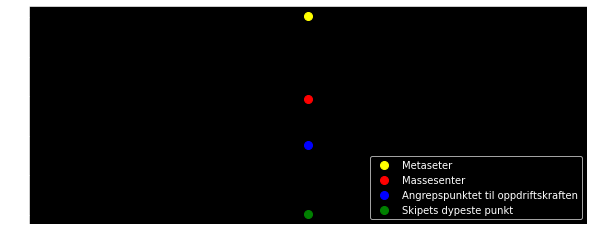

In [111]:
def Y_MB(gamma=beta):
    '''
    Input: Gamma (sector angle)
    Output: 
    '''
    return R * (4*(np.sin(gamma/2)**3))/(3*(gamma-np.sin(gamma)))

#At equilibrium
yM_0 = R*np.cos(beta/2) 
yC_0 = yM_0 - h
yB_0 = yM_0 - Y_MB(beta)
yD_0 = yM_0 - R

#print(yM_0, yC_0, yB_0, yD_0)
plt.figure(figsize=(10, 4))
plt.scatter(0,yM_0, color = 'yellow', label = "Metaseter")
plt.scatter(0,yC_0, color = 'red', label = "Massesenter")
plt.scatter(0,yB_0, color='blue', label = "Angrepspunktet til oppdriftskraften")
plt.scatter(0,yD_0, color= 'green', label = "Skipets dypeste punkt")
plt.legend(loc='lower right')
plt.grid()
plt.show()

Her er de fire punktene beskrevet ovenfor plottet langs y-aksen. De fysisike ekstremalpunktene til skipet, metasenteret og skipets dypeste punkt, ligger henholdsvis øverst og nederst. Metasenteret ligger rett under vannoverflaten, mens angrepspunktet til oppdriftskraften ligger under, men nærmest massesenteret. 

##### 1c)
Får å kunne se på bevegelsene til båten ved hjelp av numeriske metoder trenger vi en funskjon som besrkvier endringene av bevegelsene til båten. Dette gjør vi ved å sette opp en vektor $[\theta(t) \:\:\:\:\  \omega(t)]^T$. Den deriverte av denne vektoren definerer vi som $f(t,\vec{\omega})$, beskrevet av ligning (16) i oppgaveteksten, som gir oss:

$$ (t,\vec{\omega}) = \frac{d\vec{\omega}}{dt} = \frac{d}{dt}[\theta(t) \:\:\:\:\omega(t)]^T = [\frac{d\theta(t)}{dt} \:\:\:\:\ \frac{d \omega(t)}{dt}]^T$$

hvor $\frac{d\theta}{dt} = \omega$, og $\frac{d\omega}{dt}$ finnes ved ligning (12) som gir:

$$ \frac{d\omega}{dt} = \frac{\tau_B}{I_C} = -\frac{F_Bh\:sin\theta}{I_C} $$

med $F_B = \frac{1}{2}R^2(\gamma-sin\gamma) \rho _0 g$. I denne oppgaven har vi antatt at mengden fortrengt vann er konstant, som gir $A \rightarrow A_0$, og dermed at $\gamma \rightarrow \beta$.

In [82]:
t0 = 0
tend = 20
w_start = np.array([np.pi/9, 0])
theta_0 = w_start[0]
delta = 0.01


def f(t, state):
    newState = [0,0] #Lager listen som skal returneres
    F_B = 0.5*R**2 * (beta-np.sin(beta))*sigma_0*g 
    dtheta = state[1] #dtheta/dt = omega
    dw = F_B*h/I_c * np.sin(state[0]) 
    newState[0] = dtheta
    newState[1] = dw
    return np.array(newState)



##### 1f) 
Implementerer fjerde ordens Runge-Kuttas metode med: 

$$ \vec{k_1} = \vec{f}(t_i, \vec{ \omega _i}) $$

$$ \vec{k_2} = \vec{f}(t_i + \frac{h}{2}, \vec{ \omega _i} + h\frac{\vec{k_1}}{2})$$

$$ \vec{k_3} = \vec{f}(t_i + \frac{h}{2}, \vec{ \omega _i} + h\frac{\vec{k_2}}{2})$$

$$ \vec{k_4} = \vec{f}(t_i + h, \vec{ \omega _i} + h\vec{k_3})$$

og 

$$\vec{\omega _{i+1}} = \vec{\omega _i} + \frac{h}{6} (\vec{k_1} + 2 \vec{k_2} + 2 \vec{k_3}+\vec{k_4}) $$

Her er $\vec{\omega} = [\theta(t) \:\:\:\: \omega(t)]^T$, og ved å kombinere litning (13) og (15a) i oppgaveteksten får vi: 

$$ I_c \frac{d\omega}{dt} = \tau _B$$
$$I_c \frac{d\omega}{dt} = F_B h sin\theta $$
$$\frac{d\omega}{dt} = \frac{F_B h}{I_c} sin(\theta _0 e^{-\delta t} sin(\omega t))$$

som gir oss en funskjon for den deriverte av vinkelfrekvensen $\omega$, som beskrevet i ligning (16). 

In [83]:

h_step = 0.1


def RK4_step(f, t_i, w_i, h):
    ''' 
    One step using Runge_kutta
    Intput: 
        w_i: [angle theta, frequency ohmega], 
        t_i: time
        h: step length
        f: function to be solved
    Return: next function value
    '''
    k1 = f(t_i,w_i)
    k2 = f(t_i + h/2, w_i + h*k1/2)
    k3 = f(t_i + h/2, w_i + h*k2/2)
    k4 = f(t_i+ h, w_i + h*k3)

    return t_i + h,  w_i + h/6 *(k1+ 2*k2 + 2*k3 + k4)

def euler_step(f, t_i, w_i, h):
    return t_i + h, w_i + h * f(t_i, w_i)

def ode_solver(f, x0, xend, y0, h=0.01, method=RK4_step):
    '''
    Solves non linear equations using a given method
    Input: 
        f - function to solve
        x0 - start value, (t0)
        xend - the last x-value
        y0 - start value for y axis
        h - step length
        method
    Output: 
        two arrays containing x-values and corresponging y-values. 
    '''
    #initialisere 
    x_num = np.array([x0])
    y_num = np.array([y0])
    xn = x0
    yn = y0

    while xn < xend - 1.e-10:
        xn, yn = method(f, xn, yn, h) #Do one step
        y_num = np.concatenate((y_num, np.array([yn])))
        x_num = np.append(x_num,xn)
        
    return x_num, y_num




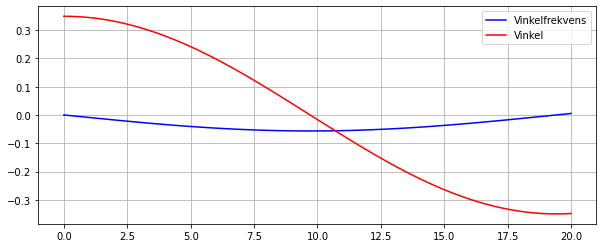

In [88]:
w_start = np.array([np.pi/9, 0])
x,y = ode_solver(f, 0, 20, w_start, 0.01, euler_step)

theta = []
w = []
for state in y: 
    theta.append(state[0])
    w.append(state[1])



plt.figure(figsize=(10, 4))
plt.plot(x, w, color = 'blue', label = "Vinkelfrekvens")
plt.plot(x, theta, color = 'red', label = "Vinkel")

plt.legend()
plt.grid()

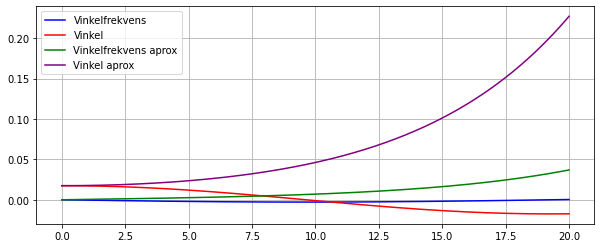

In [89]:
#Lager en funksjon som løser ligning 10 numerisk.

def f_forenklet(t, state):
    newState = [0,0]
    dtheta = state[1]
    dw = -m*g*h*state[0] / I_c
    newState[0] = dtheta
    newState[1] = dw
    return np.array(newState)

w_start = [np.pi/180, 0]

x,y = ode_solver(f, 0, 20, w_start, 0.01, euler_step)

theta = []
w = []
for state in y: 
    theta.append(state[0])
    w.append(state[1])

x2, y2 = ode_solver(f_forenklet, 0, 20, w_start, 0.01, euler_step)

theta2 = []
w2 = []
for state in y2: 
    theta2.append(state[0])
    w2.append(state[1])

plt.figure(figsize=(10, 4))
plt.plot(x, w, color = 'blue', label = "Vinkelfrekvens")
plt.plot(x, theta, color = 'red', label = "Vinkel")
plt.plot(x, w2, color = 'green', label = "Vinkelfrekvens aprox")
plt.plot(x, theta2, color = 'purple', label = "Vinkel aprox")
plt.legend()
plt.grid()

Med småvinkeltilnærming får vi likning 10 i oppgavedokumentet: 

$-mgh\theta = I_c \cdot \ddot{\theta} $

En mulig analytisk løsning blir da:

$\theta = \sqrt{-\frac{I_c}{mgh}} \cdot sin(t)$

In [ ]:
t = np.linspace(0,20,0.01)
def theta_analytisk(t):
    return np.sqrt(-i_)

## Oppgave 2

#### 2a, b, c, d, e)

definerer state vektoren som:
$$[\dot{x}, \dot{y}, x, y, \dot{\theta}, \theta, \dot{s_L}, s_L]$$

Der x, y er henholdsvis posisjonen til masse senteret til båten og $s_L$ er posisjonen til lasten fra massesenteret til systemet.

In [ ]:
y_M0 = R * np.cos(beta / 2)
y_C0 = y_M0 - h
y_B0 = y_M0 - Y_MB()
y_D0 = y_M0 - R


k_f = 100 #just making something up

#vind
F_0 = 300
w_w = 1 #frequency of wind.

# Last
m_L = 0.05 * m #last masse.
mu_last = 0.35 #friksjons koefsient mellom last og båt


wload = True
fence = True

In [ ]:
def f_wload(t, s):
    """
    input:
        t: time,
        s: state,
        wload: (bool) load on board
        fence: (bool) fence on boat
    """

    #state som skal returneres
    state_dot = np.zeros(len(s))

    #pakker ut state vektoren
    x_dot, y_dot = s[0], s[1]
    x, y = s[2], s[3]
    theta_dot = s[4]
    theta = s[5]
    s_Ldot = s[6]
    s_L = s[7]
    
    delta_y = y - y_C0 #tyngde punktets relative bevegelse.

    #sektor vinkel:
    gamma = 2 * np.arccos(np.cos(beta/2) - 4 / (3 * np.pi) * (1 - np.cos(theta)) + delta_y / R)
 
    #areal:
    A = 0.5 * R**2 * (gamma - np.sin(gamma))

    #krefter på båten:
    F_B = A * sigma_0 * g #boyuansy force. Fancy french
    F_G = - m * g #gravity
    f_small = - k_f * R * gamma * theta_dot #friksjons kraft fra vannet på båten
    F_w = F_0 * np.cos(w_w * t) #kraft fra vind
    
    
    #krefter på lasten:
    if(abs(s_L) < R and wload): #sjekker om lasten er på båten
        #regner kun ut kreftene om lasten er på båten, ellers er alt null.
        F_sx = - m_L * g * np.cos(theta) #y-komponent
        F_sy = - mu_last * m_L * g * np.cos(theta) + m_L * g * np.sin(theta) # - R + G*sin(theta)

        F_Ly = - m_L * g * (np.cos(theta))**2 #kontakt kraft fra last i x retning
        F_Lx = m_L * g * np.cos(theta) * np.sin(theta) # -=- i y retning.


    elif(abs(s_L) >= R and fence): #sjekker om lasten er på gjerdet
        F_sx = - m_L * g * np.cos(theta) #y-komponent
        F_sy = 0

        F_Ly = - m_L * g * (np.cos(theta))**2 #kontakt kraft fra last i x retning
        F_Lx = m_L * g * np.cos(theta) * np.sin(theta) # -=- i y retning.

    else: s_Ldotdot, s_Ldot, F_sx, F_sy, F_Ly, F_Lx = 0, 0, 0, 0, 0, 0 #alle krefter er null siden den har falt av båten.

    #dreie momenter:
    tau_B = F_B * h * np.sin(theta) #dreiemoment fra bouyancy kraft
    tau_f = f_small * (y - (R * (np.cos(gamma/2)) - 1))
    tau_w = F_w * y
    tau_L = F_sx * s_L

    #regner ut summen av kreftene på båten: 
    F_sum_x = f_small + F_w + F_Lx #newtons
    F_sum_y = F_G + F_B + F_Ly #newtons

    #regner ut summen av dreiemomenter på båten:
    tau_sum = tau_B + tau_f + tau_w + tau_L


    #lager ny state:
    state_dot[0] = F_sum_x / m  #akselerasjon i x retning
    state_dot[1] = F_sum_y / m  #akselerasjon i y retning
    state_dot[2] = x_dot #x -> xdot
    state_dot[3] = y_dot #y -> ydot
    state_dot[4] = tau_sum / I_c  #theta_dot -> theta_dotdot
    state_dot[5] = theta_dot #theta -> theta_dot
    state_dot[6] = F_sy / m_L
    state_dot[7] = s_Ldot

    #sjekker for kantring:
    if(theta > (np.pi - gamma) / 2):
        state_dot = np.zeros(len(s))

    return state_dot


In [ ]:
def plot_solver_data(tid, states, txt=""): #plots the evolution of the state
    fig, axs = plt.subplots(4, 2,figsize = (10, 8))
    fig.suptitle(txt, fontsize=16)
    headers = {0:"x_dot", 1:"y_dot", 2:"x", 3:"y", 4:"theta_dot", 5:"theta", 6:"x last", 7:"x_dot last"}

    index = 0
    for i in range(4):
        for j in range(2):
            axs[i][j].plot(tid, states[:, index])
            axs[i][j].set_title(headers[index])
            index += 1
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)


In [ ]:
t0 = 0
t_end = 100
init_state = [0, 0, 0, 0, 0, np.pi / 12, 0, 0]

tid_rk4, states_rk4 = ode_solver(f_wload, t0, t_end, init_state, method=RK4_step)
#tid_euler, states_euler = ode_solver(Ode, t0, t_end, init_state, method=euler_step)

UnboundLocalError: local variable 'F_sx' referenced before assignment

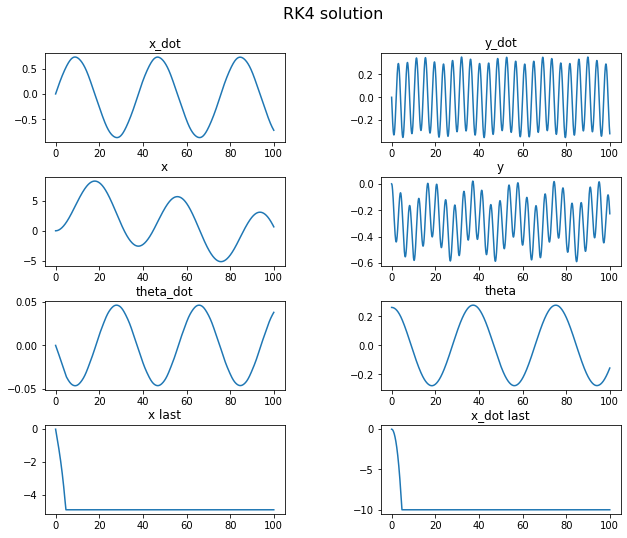

In [ ]:
plot_solver_data(tid_rk4, states_rk4, "RK4 solution")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=51ce7be8-9a96-4da6-a73f-5c8b71a15bb7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>